<a href="https://colab.research.google.com/github/mohdfawad99/apsit_ml_track/blob/master/CODER's_WEEK_ML_TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('http://iali.in/datasets/mushrooms.csv')

In [50]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [51]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [8]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for col in df.columns :
  df[col] = labelencoder.fit_transform(df[col])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [62]:
new_df = df.drop(['stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color','ring-number'], axis=1)
new_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,0,3,0,1


In [21]:
x = new_df.iloc[:,1:].values
print ("\nOriginal data values : \n", x)
y = new_df.iloc[:,0].values


Original data values : 
 [[5 2 4 ... 2 3 5]
 [5 2 9 ... 3 2 1]
 [0 2 8 ... 3 2 3]
 ...
 [2 2 4 ... 0 1 2]
 [3 3 4 ... 7 4 2]
 [5 2 4 ... 4 1 2]]


#Min Max

In [19]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range =(0, 1))  
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
  
print ("After min max Scaling : \n", x_after_min_max_scaler) 

After min max Scaling : 
 [[1.         0.66666667 0.44444444 ... 0.25       0.6        0.83333333]
 [1.         0.66666667 1.         ... 0.375      0.4        0.16666667]
 [0.         0.66666667 0.88888889 ... 0.375      0.4        0.5       ]
 ...
 [0.4        0.66666667 0.44444444 ... 0.         0.2        0.33333333]
 [0.6        1.         0.44444444 ... 0.875      0.8        0.33333333]
 [1.         0.66666667 0.44444444 ... 0.5        0.2        0.33333333]]


#Standardization

In [33]:
from sklearn.preprocessing import StandardScaler
Standardisation = StandardScaler() 
  
# Scaled feature 
X = Standardisation.fit_transform(x) 
  
print ("\nAfter Standardisation : \n", X) 


After Standardisation : 
 [[ 1.02971224  0.14012794 -0.19824983 ... -0.67019486 -0.5143892
   2.03002809]
 [ 1.02971224  0.14012794  1.76587407 ... -0.2504706  -1.31310821
  -0.29572966]
 [-2.08704716  0.14012794  1.37304929 ... -0.2504706  -1.31310821
   0.86714922]
 ...
 [-0.8403434   0.14012794 -0.19824983 ... -1.50964337 -2.11182722
   0.28570978]
 [-0.21699152  0.95327039 -0.19824983 ...  1.42842641  0.28432981
   0.28570978]
 [ 1.02971224  0.14012794 -0.19824983 ...  0.16925365 -2.11182722
   0.28570978]]


#Training

In [57]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [0]:
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

In [59]:
#Fitting Random Forest Classification in Train Set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#Predicting test set results
y_pred = classifier.predict(X_test)

In [61]:
#Checking Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.9911373707533235

In [65]:
from sklearn.metrics import  classification_report

classes = ['0', '1']
classification_report(y_test, y_pred, target_names=classes)

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98       882\n           1       1.00      0.99      0.99      3180\n\n    accuracy                           0.99      4062\n   macro avg       0.98      0.99      0.99      4062\nweighted avg       0.99      0.99      0.99      4062\n'

In [66]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
4057,0,0
4058,0,0
4059,0,0
4060,1,1


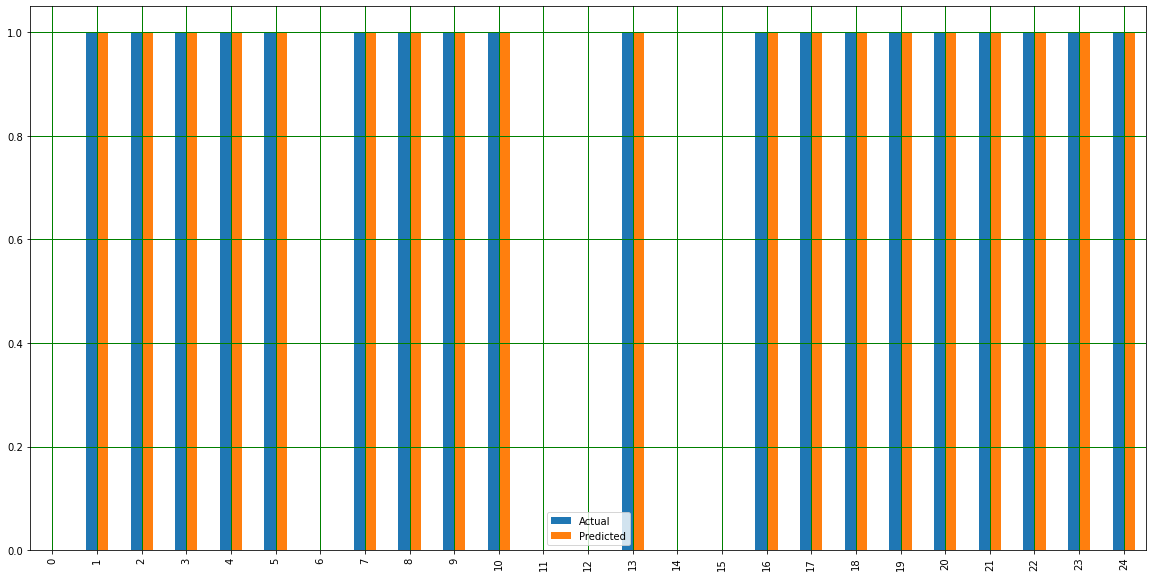

In [76]:
import matplotlib.pyplot as plt
df1 = df.head(25)
df1.plot(kind='bar', figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()